## FastICA Example
Source: [scikit-learn docs](http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html)

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

Automatically created module for IPython interactive environment


In [3]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)

S = np.c_[s1, s2, s3] # concatenates along second axis
S += 0.2 * np.random.normal(size=S.shape) # "Add noise"

S /= S.std(axis=0) # "Standardize data"
# mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]) # making a mixing matrix
X = np.dot(S, A.T) # generate observations

The mixing matrix (line 14) is matrix multiplied by the signal matrix (line 15)

Matrix multiplication adds the signals together in the resultant matrix

![Example MTX mult](http://www.geeksforgeeks.org/wp-content/uploads/strassen_new.png)

In [4]:
# compute ICA
ica = FastICA(n_components = 3)
S_ = ica.fit_transform(X) # fitting to observations
A_ = ica.mixing_ # getting estimated mixing mtx

In [6]:
# proving applicability of ICA model by reverting & unmixing
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_) # if false, throws assertion error (bug check)

In [7]:
# computing PCA for comparison
pca = PCA(n_components=3)
H = pca.fit_transform(X) # reconstructs signals based on orthogonal components
# have little understanding of above comment, from docs

### Results plotted below

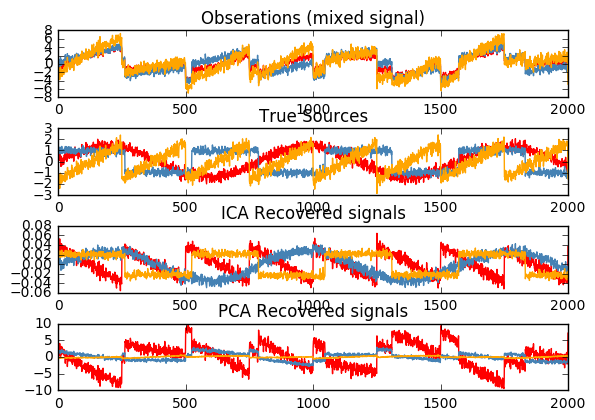

In [9]:
plt.figure()

models = [X, S, S_, H]
names = ['Obserations (mixed signal)',
         'True Sources',
         'ICA Recovered signals',
         'PCA Recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1): # enumerate returns (iterator, list(i))
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
        
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()